<a href="https://colab.research.google.com/github/EliMorejon24/ExamenElizabethMorejon/blob/main/CREMA_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Speech Emotion Recognition Using CREMA-D


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import librosa
import numpy as np
from tqdm.notebook import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import IPython.display as ipd
import librosa.display
import numpy as np
import cv2
import pickle
from sklearn.cluster import KMeans

# Plot style
plt.style.use('ggplot')

In [3]:
# loading data
main_path = '/content/drive/MyDrive/data'

TESS = os.path.join(main_path, "TESS/")
RAV = os.path.join(main_path, "RAVDESS/")
SAVEE = os.path.join(main_path, "SAVEE/")
CREMA = os.path.join(main_path, "CREMAD/")
MESD = os.path.join(main_path, "MESD/")

In [4]:
Crema = "/content/drive/MyDrive/data/CREMAD"

DATA PREPARATION

In [5]:
emotion_df = []

for wav in os.listdir(Crema):
    info = wav.partition(".wav")[0].split("_")
    if info[2] == 'SAD':
        emotion_df.append(("sad", Crema + "/" + wav))
    elif info[2] == 'ANG':
        emotion_df.append(("angry", Crema + "/" + wav))
    elif info[2] == 'DIS':
        emotion_df.append(("disgust", Crema + "/" + wav))
    elif info[2] == 'FEA':
        emotion_df.append(("fear", Crema + "/" + wav))
    elif info[2] == 'HAP':
        emotion_df.append(("happy", Crema + "/" + wav))
    elif info[2] == 'NEU':
        emotion_df.append(("neutral", Crema + "/" + wav))
    else:
        emotion_df.append(("unknown", Crema + "/" + wav))


Crema_df = pd.DataFrame.from_dict(emotion_df)
Crema_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)

Crema_df.head()

,Emotion,Path
0,sad,/content/drive/MyDrive/data/CREMAD/1003_TAI_SA...
1,neutral,/content/drive/MyDrive/data/CREMAD/1002_WSI_NE...
2,angry,/content/drive/MyDrive/data/CREMAD/1004_WSI_AN...
3,angry,/content/drive/MyDrive/data/CREMAD/1004_IWL_AN...
4,disgust,/content/drive/MyDrive/data/CREMAD/1004_IWW_DI...


In [6]:
df = Crema_df.copy()
df.shape
df.head(10)

,Emotion,Path
0,sad,/content/drive/MyDrive/data/CREMAD/1003_TAI_SA...
1,neutral,/content/drive/MyDrive/data/CREMAD/1002_WSI_NE...
2,angry,/content/drive/MyDrive/data/CREMAD/1004_WSI_AN...
3,angry,/content/drive/MyDrive/data/CREMAD/1004_IWL_AN...
4,disgust,/content/drive/MyDrive/data/CREMAD/1004_IWW_DI...
5,angry,/content/drive/MyDrive/data/CREMAD/1002_IOM_AN...
6,sad,/content/drive/MyDrive/data/CREMAD/1001_IWL_SA...
7,happy,/content/drive/MyDrive/data/CREMAD/1001_IEO_HA...
8,disgust,/content/drive/MyDrive/data/CREMAD/1005_IWW_DI...
9,sad,/content/drive/MyDrive/data/CREMAD/1001_IWW_SA...


In [7]:
df = Crema_df.copy()
df.shape
df.head(10)

,Emotion,Path
0,sad,/content/drive/MyDrive/data/CREMAD/1003_TAI_SA...
1,neutral,/content/drive/MyDrive/data/CREMAD/1002_WSI_NE...
2,angry,/content/drive/MyDrive/data/CREMAD/1004_WSI_AN...
3,angry,/content/drive/MyDrive/data/CREMAD/1004_IWL_AN...
4,disgust,/content/drive/MyDrive/data/CREMAD/1004_IWW_DI...
5,angry,/content/drive/MyDrive/data/CREMAD/1002_IOM_AN...
6,sad,/content/drive/MyDrive/data/CREMAD/1001_IWL_SA...
7,happy,/content/drive/MyDrive/data/CREMAD/1001_IEO_HA...
8,disgust,/content/drive/MyDrive/data/CREMAD/1005_IWW_DI...
9,sad,/content/drive/MyDrive/data/CREMAD/1001_IWW_SA...


Exploratory Data Analysis

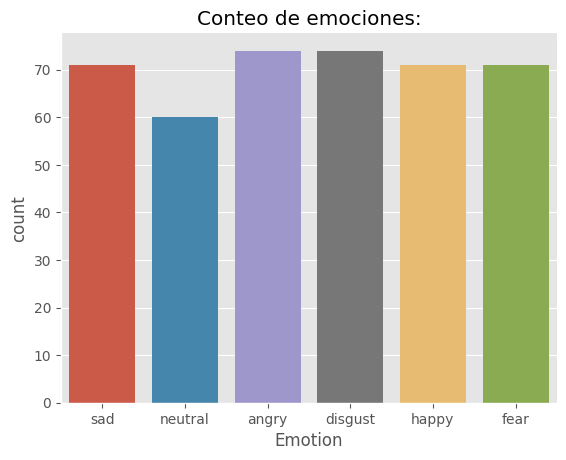

In [8]:
%matplotlib inline

plt.style.use("ggplot")

plt.title("Conteo de emociones:")
sns.countplot(x=df["Emotion"])
plt.savefig("/content/drive/MyDrive/kaggle/working/Emotion_Count.eps")
sns.despine(top=True, right=True, left=False, bottom=False)

In [9]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {e} emotion', size=15)
    librosa.display.waveshow(data, sr=sr, color="purple")
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

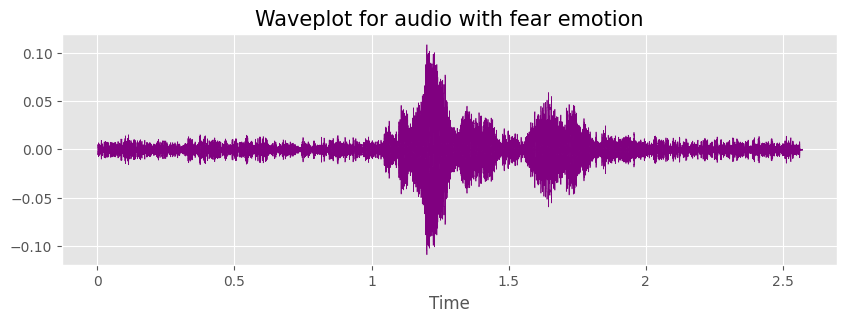

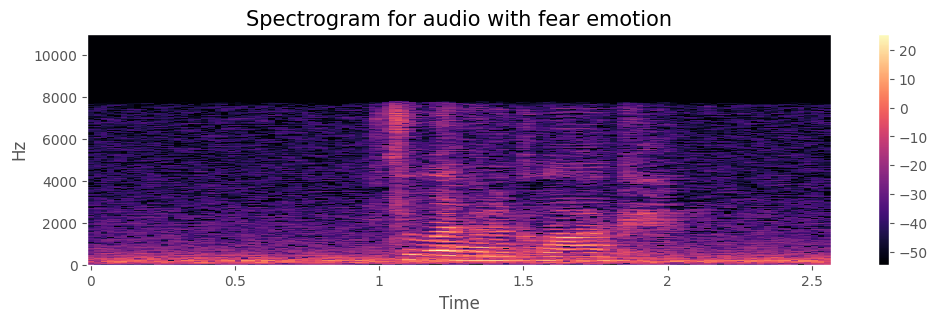

In [10]:
from IPython.display import Audio

emotion='fear'
path = np.array(df.Path[df.Emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

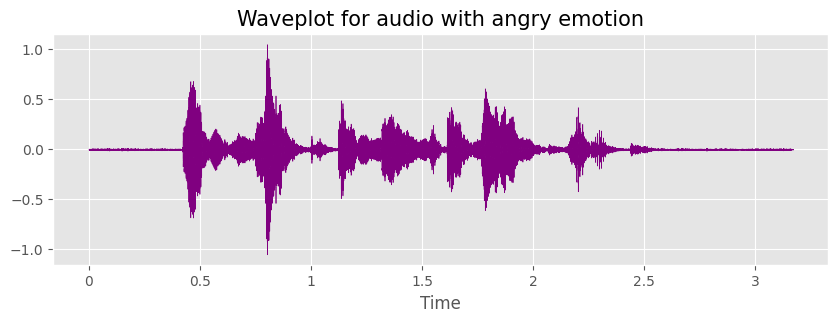

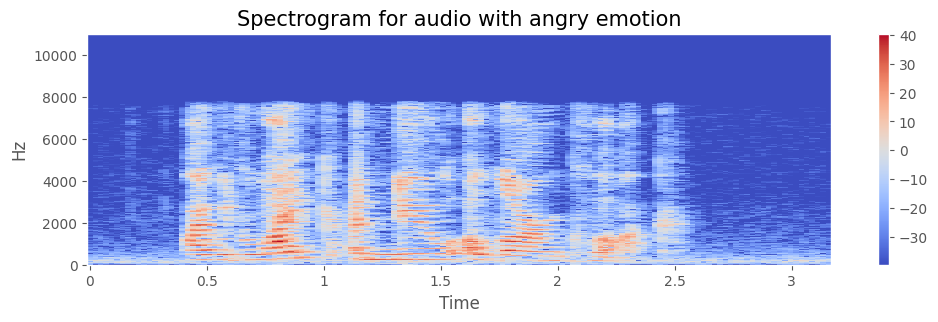

In [11]:
emotion='angry'
path = np.array(df.Path[df.Emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

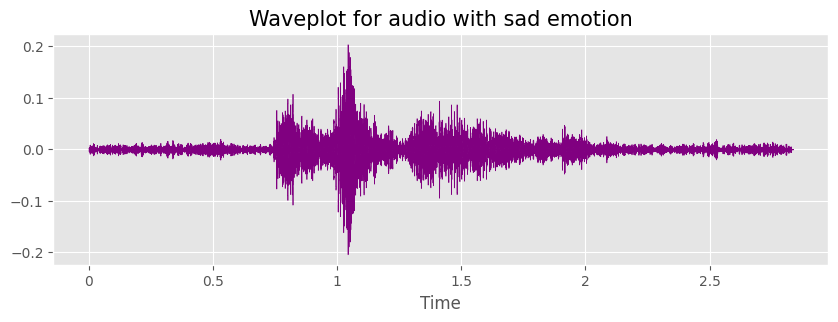

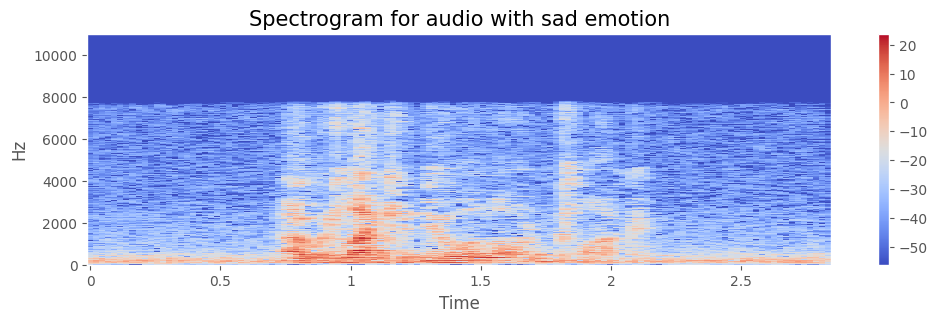

In [12]:
emotion='sad'
path = np.array(df.Path[df.Emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

Data Augmentation

In [13]:
def noise(data, random=False, rate=0.035, threshold=0.075):
    """Add some noise to sound sample. Use random if you want to add random noise with some threshold.
    Or use rate Random=False and rate for always adding fixed noise."""
    if random:
        rate = np.random.random() * threshold
    noise_amp = rate*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data):
    """Stretching data with some rate."""
    return librosa.effects.time_stretch(data, rate=0.5)

def shift(data, rate=1000):
    """Shifting data with some rate"""
    shift_range = int(np.random.uniform(low=-5, high = 5)*rate)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor, random=False):
    """"Add some pitch to sound sample. Use random if you want to add random pitch with some threshold.
    Or use pitch_factor Random=False and rate for always adding fixed pitch."""
    if random:
        pitch_factor=np.random.random() * pitch_factor
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)

In [14]:
# Taking one sample from the dataset to check Data Augmentation techniques

path = df[df["Emotion"] == "happy"]["Path"].iloc[0]
data, sampling_rate = librosa.load(path)

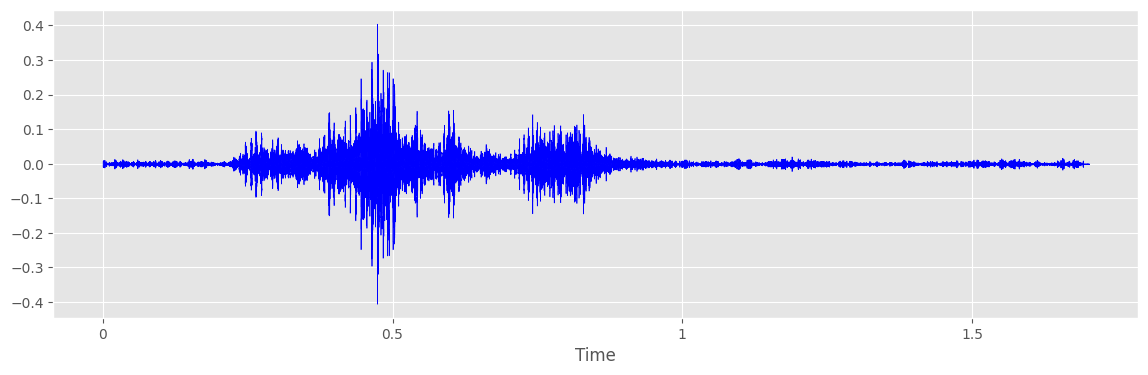

In [15]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(data, sr=sampling_rate, color="blue")
Audio(path)

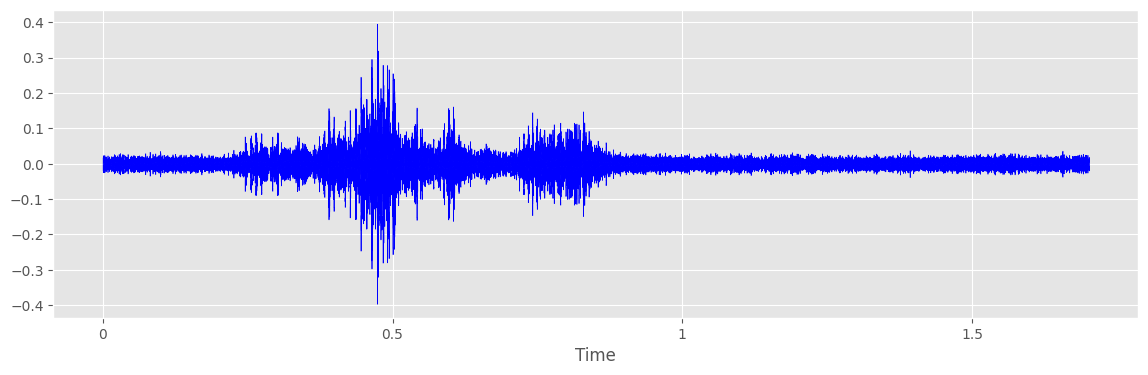

In [16]:
noised_data = noise(data, random=True)
plt.figure(figsize=(14,4))
librosa.display.waveshow(noised_data, sr=sampling_rate, color="blue")
Audio(noised_data, rate=sampling_rate)

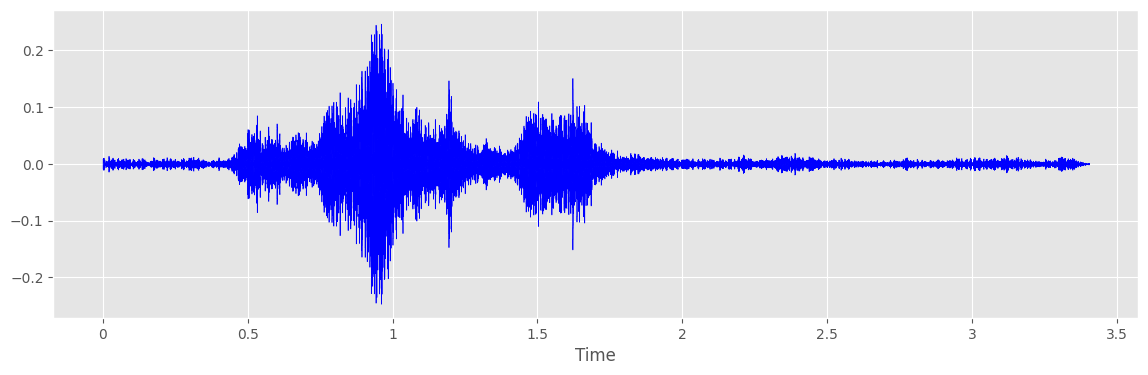

In [17]:
stretched_data = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(stretched_data, sr=sampling_rate, color="blue")
Audio(stretched_data, rate=sampling_rate)

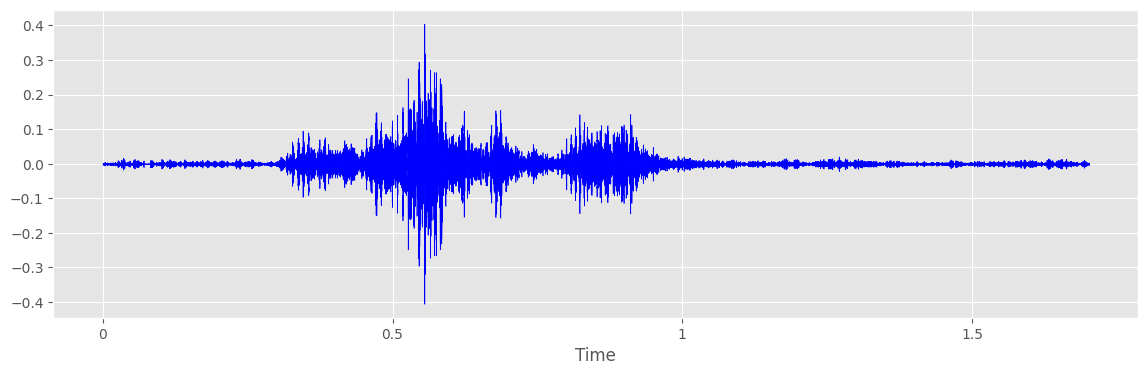

In [18]:
shifted_data = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=shifted_data, sr=sampling_rate, color="blue")
Audio(shifted_data, rate=sampling_rate)

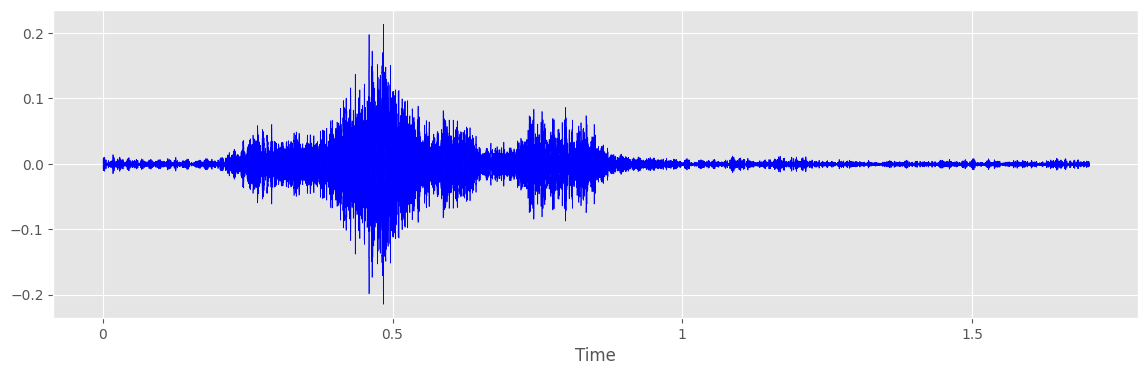

In [19]:
#Pitching

pitched_data = pitch(data, sampling_rate, pitch_factor=3,random=False)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=pitched_data, sr=sampling_rate, color="blue")
Audio(pitched_data, rate=sampling_rate)

Feature Extraction

In [20]:
n_fft = 2048
hop_length = 512

def chunks(data, frame_length, hop_length):
    for i in range(0, len(data), hop_length):
        yield data[i:i+frame_length]

# Zero Crossing Rate
def zcr(data, frame_length=2048, hop_length=512):
    zcr = librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)


def energy(data, frame_length=2048, hop_length=512):
    en = np.array([np.sum(np.power(np.abs(data[hop:hop+frame_length]), 2)) for hop in range(0, data.shape[0], hop_length)])
    return en / frame_length


def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)


def entropy_of_energy(data, frame_length=2048, hop_length=512):
    energies = energy(data, frame_length, hop_length)
    energies /= np.sum(energies)

    entropy = 0.0
    entropy -= energies * np.log2(energies)
    return entropy


def spc(data, sr, frame_length=2048, hop_length=512):
    spectral_centroid = librosa.feature.spectral_centroid(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)
    return np.squeeze(spectral_centroid)


def spc_flux(data):
    isSpectrum = data.ndim == 1
    if isSpectrum:
        data = np.expand_dims(data, axis=1)

    X = np.c_[data[:, 0], data]
    af_Delta_X = np.diff(X, 1, axis=1)
    vsf = np.sqrt((np.power(af_Delta_X, 2).sum(axis=0))) / X.shape[0]

    return np.squeeze(vsf) if isSpectrum else vsf


def spc_rollof(data, sr, frame_length=2048, hop_length=512):
    spcrollof = librosa.feature.spectral_rolloff(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)
    return np.squeeze(spcrollof)

def chroma_stft(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    stft = np.abs(librosa.stft(data))
    chroma_stft = librosa.feature.chroma_stft(S=stft, sr=sr)
    return np.squeeze(chroma_stft.T) if not flatten else np.ravel(chroma_stft.T)


def mel_spc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mel = librosa.feature.melspectrogram(y=data, sr=sr)
    return np.squeeze(mel.T) if not flatten else np.ravel(mel.T)

def mfcc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mfcc_feature = librosa.feature.mfcc(y=data, sr=sr)
    return np.squeeze(mfcc_feature.T) if not flatten else np.ravel(mfcc_feature.T)

In [21]:
# Taking one sample from the dataset to perform data tranformation techniques on it

path = np.array(df["Path"])[420]
data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
len(data)

53723

In [22]:
print("ZCR: ", zcr(data).shape)
print("Energy: ", energy(data).shape)
print("Entropy of Energy :", entropy_of_energy(data).shape)
print("RMS :", rmse(data).shape)
print("Spectral Centroid :", spc(data, sampling_rate).shape)
# print("Spectral Entropy: ", spc_entropy(data, sampling_rate).shape)
print("Spectral Flux: ", spc_flux(data).shape)
print("Spectral Rollof: ", spc_rollof(data, sampling_rate).shape)
print("Chroma STFT: ", chroma_stft(data, sampling_rate).shape)
print("MelSpectrogram: ", mel_spc(data, sampling_rate).shape)
print("MFCC: ", mfcc(data, sampling_rate).shape)

ZCR:  (105,)
Energy:  (105,)
Entropy of Energy : (105,)
RMS : (105,)
Spectral Centroid : (105,)
Spectral Flux:  ()
Spectral Rollof:  (105,)
Chroma STFT:  (1260,)
MelSpectrogram:  (13440,)
MFCC:  (2100,)


In this project we will use 3 main Data Transformation features : ZCR, RMS and MFCC.

In [23]:
def extract_features(data, sr, frame_length=2048, hop_length=512):
    result = np.array([])
    result = np.hstack((result,
                        zcr(data, frame_length, hop_length),
                        rmse(data, frame_length, hop_length),
                        mfcc(data, sr, frame_length, hop_length)
                        #chroma_stft(data, sr, frame_length, hop_length),
                        #mel_spc(data, sr, frame_length, hop_length),
                        #spc(data, sr, frame_length=2048, hop_length=512),
                        #spc_rollof(data, sr, frame_length=2048, hop_length=512),
                        #entropy_of_energy(data, frame_length=2048, hop_length=512)
                        ))
    return result

In [24]:
def get_features(path, duration=2.5, offset=0.6):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=duration, offset=offset)

     # without augmentation
    res1 = extract_features(data, sample_rate)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data, random=True)
    res2 = extract_features(noise_data, sample_rate)
    result = np.vstack((result, res2)) # stacking vertically

    # data with pitching
    pitched_data = pitch(data, sample_rate, pitch_factor=3, random=False)

    res3 = extract_features(pitched_data, sample_rate)
    result = np.vstack((result, res3)) # stacking vertically

    # data with pitching and noise
    new_data = pitch(data, sample_rate, pitch_factor=3, random=False)
    data_noise_pitch = noise(new_data, random=True)
    res3 = extract_features(data_noise_pitch, sample_rate)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [25]:
X, Y = [], []
for path, emotion in zip(df.Path, df.Emotion):
    features = get_features(path)
    for ele in features:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [26]:
features_path = "/content/drive/MyDrive/kaggle/working/features.csv"

In [27]:
extracted_df = pd.DataFrame(X)
extracted_df["labels"] = Y
extracted_df.to_csv(features_path, index=False)

In [28]:
extracted_df = pd.read_csv("/content/drive/MyDrive/kaggle/working/features.csv")
print(extracted_df.shape)

(1684, 2377)


In [29]:
# Fill NaN with 0
extracted_df = extracted_df.fillna(0)
print(extracted_df.isna().any())
extracted_df.shape

0         False
1         False
2         False
3         False
4         False
          ...  
2372      False
2373      False
2374      False
2375      False
labels    False
Length: 2377, dtype: bool


(1684, 2377)

In [30]:
extracted_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,labels
0,0.027344,0.049316,0.072754,0.069824,0.081055,0.081055,0.082520,0.099609,0.109375,0.122559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sad
1,0.028320,0.051270,0.074707,0.071777,0.082031,0.082031,0.083496,0.100586,0.111328,0.123535,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sad
2,0.033691,0.059570,0.084473,0.088867,0.100098,0.104492,0.116699,0.130859,0.144531,0.154785,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sad
3,0.050293,0.090820,0.145996,0.156250,0.177734,0.186523,0.173340,0.181641,0.177734,0.171387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sad
4,0.276367,0.375488,0.440430,0.375000,0.259277,0.187012,0.145508,0.097656,0.094727,0.087402,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral


Data Preparation

In [31]:
X = extracted_df.drop(labels="labels", axis=1)
Y = extracted_df["labels"]

In [32]:
# Encoding Emotion Labels with LabelEncoder()
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

lb = LabelEncoder()
Y = np_utils.to_categorical(lb.fit_transform(Y))
print(lb.classes_)
Y

['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad']


array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [33]:
# saving flattened format of LabelEncoder using pickle for further usage
filename = "Enc_labels.sav"
pickle.dump(lb,open(filename,"wb"))

In [34]:
t_lb = pickle.load(open("Enc_labels.sav","rb"))
t_lb.classes_

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad'],
      dtype=object)

In [35]:
# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 2376), (337, 2376), (1347, 6), (337, 6))

In [36]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.1, shuffle=True)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((1212, 2376), (337, 2376), (135, 2376), (1212, 6), (337, 6), (135, 6))

In [39]:
# Feature Scaling using Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((1212, 2376), (337, 2376), (135, 2376), (1212, 6), (337, 6), (135, 6))

In [40]:
scaling_Parameters = pd.DataFrame({"Mean":scaler.mean_, "Var":scaler.var_})
scaling_Parameters.to_csv("Scaling_Parameters_copy")

In [41]:
# We have to use 1-dimensional CNN for which we need specific shape
X_train = np.expand_dims(X_train, axis=2)
X_val = np.expand_dims(X_val, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(1212, 2376, 1)

Let's define our model:


In [42]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, LSTM, Bidirectional
from tensorflow.keras.utils import to_categorical


from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, LSTM, Bidirectional
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint


In [43]:
model = Sequential()
model.add(layers.Conv1D(512, kernel_size=5, strides=1,
                        padding="same", activation="relu",
                        input_shape=(X_train.shape[1], 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(512, kernel_size=5, strides=1,
                        padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(256, kernel_size=5, strides=1,
                        padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(layers.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=3, strides = 2, padding = 'same'))

model.add(layers.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=3, strides = 2, padding = 'same'))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(6, activation="softmax"))


model.compile(optimizer = 'Adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2376, 512)         3072      
                                                                 
 batch_normalization (BatchN  (None, 2376, 512)        2048      
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1188, 512)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1188, 512)         1311232   
                                                                 
 batch_normalization_1 (Batc  (None, 1188, 512)        2048      
 hNormalization)                                                 
                                                        

In [44]:
rlrp = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
earlystopping = EarlyStopping(monitor ="val_accuracy",
                              mode = 'auto', patience = 5,
                              restore_best_weights = True)

history=model.fit(X_train, y_train, batch_size=64, epochs=2, validation_data=(X_val, y_val), callbacks=[rlrp])

Epoch 1/2
19/19 [==============================] - 459s 23s/step - loss: 1.9848 - accuracy: 0.2880 - val_loss: 2.0473 - val_accuracy: 0.2296 - lr: 0.0010
Epoch 2/2
19/19 [==============================] - 457s 24s/step - loss: 1.3653 - accuracy: 0.4662 - val_loss: 2.0836 - val_accuracy: 0.2296 - lr: 0.0010


11/11 [==============================] - 34s 3s/step - loss: 2.0712 - accuracy: 0.2018


Accuracy of our model on test data :  20.18 %


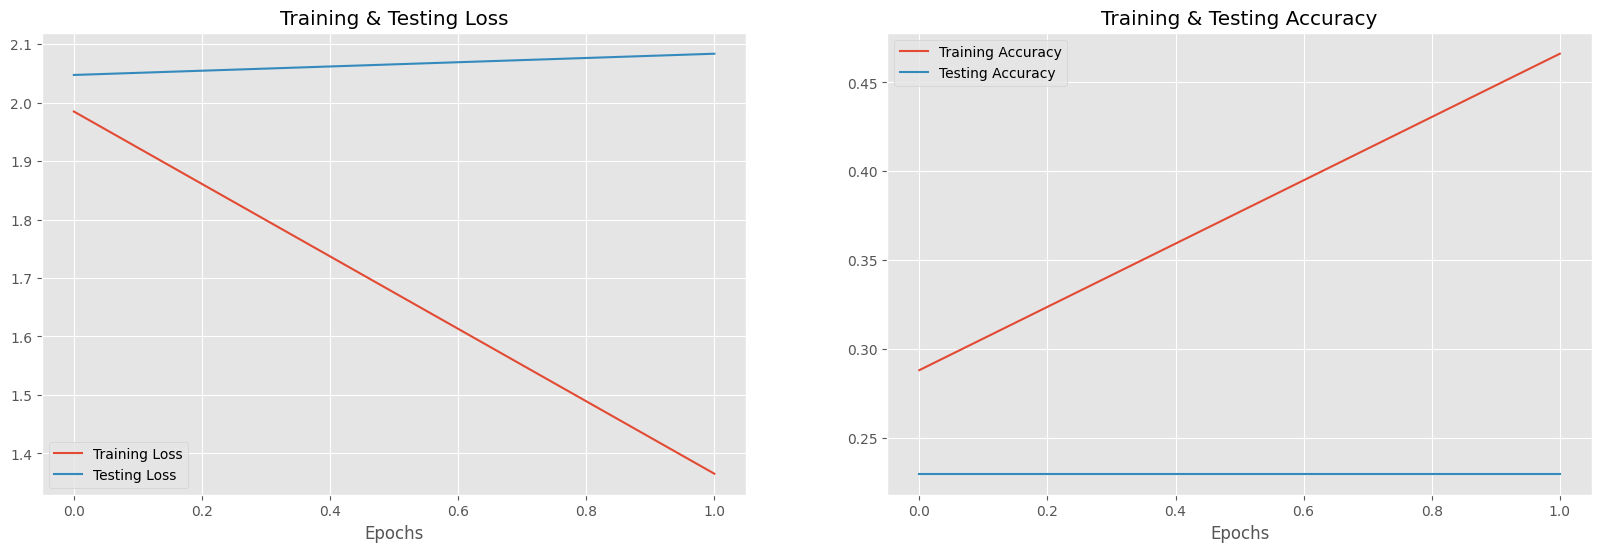

In [46]:
print("Accuracy of our model on test data : " , round(model.evaluate(X_test,y_test)[1]*100,2) , "%")

epochs = [i for i in range(2)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.savefig("/content/drive/MyDrive/kaggle/working/training-testing.eps")

plt.show()

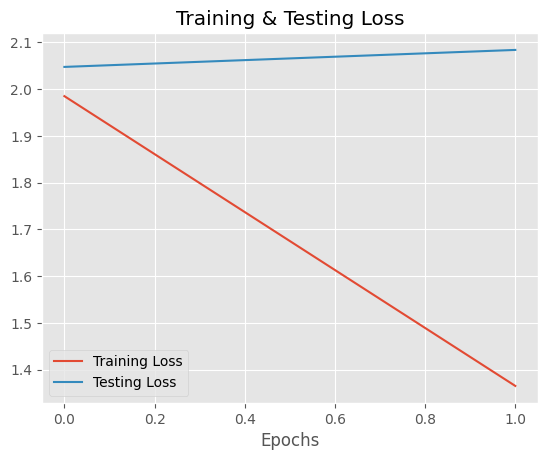

In [47]:
plt.plot(epochs , train_loss , label = 'Training Loss')
plt.plot(epochs , test_loss , label = 'Testing Loss')
plt.title('Training & Testing Loss')
plt.legend()
plt.xlabel("Epochs")
plt.savefig("/content/drive/MyDrive/kaggle/working/training-testing-loss.eps")
plt.show()

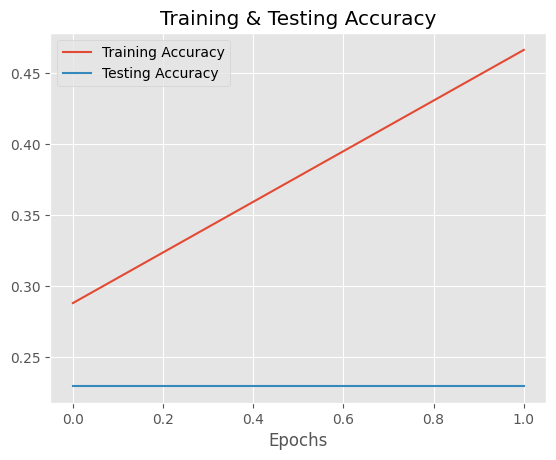

In [48]:
plt.plot(epochs , train_acc , label = 'Training Accuracy')
plt.plot(epochs , test_acc , label = 'Testing Accuracy')
plt.title('Training & Testing Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.savefig("/content/drive/MyDrive/kaggle/working/training-testing-accuracy.eps")
plt.show()

In [49]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred_class = [lb.classes_[idx] for idx in y_pred ]

11/11 [==============================] - 29s 3s/step


In [50]:
y_test_class = np.argmax(y_test, axis=1)
y_test_class = [lb.classes_[idx] for idx in y_test_class ]

In [51]:
result = pd.DataFrame({"Actual":y_test_class, "Predicted":y_pred_class})
result

,Actual,Predicted
0,fear,disgust
1,fear,angry
2,sad,angry
3,happy,angry
4,angry,disgust
...,...,...
332,happy,angry
333,fear,angry
334,happy,disgust
335,fear,angry


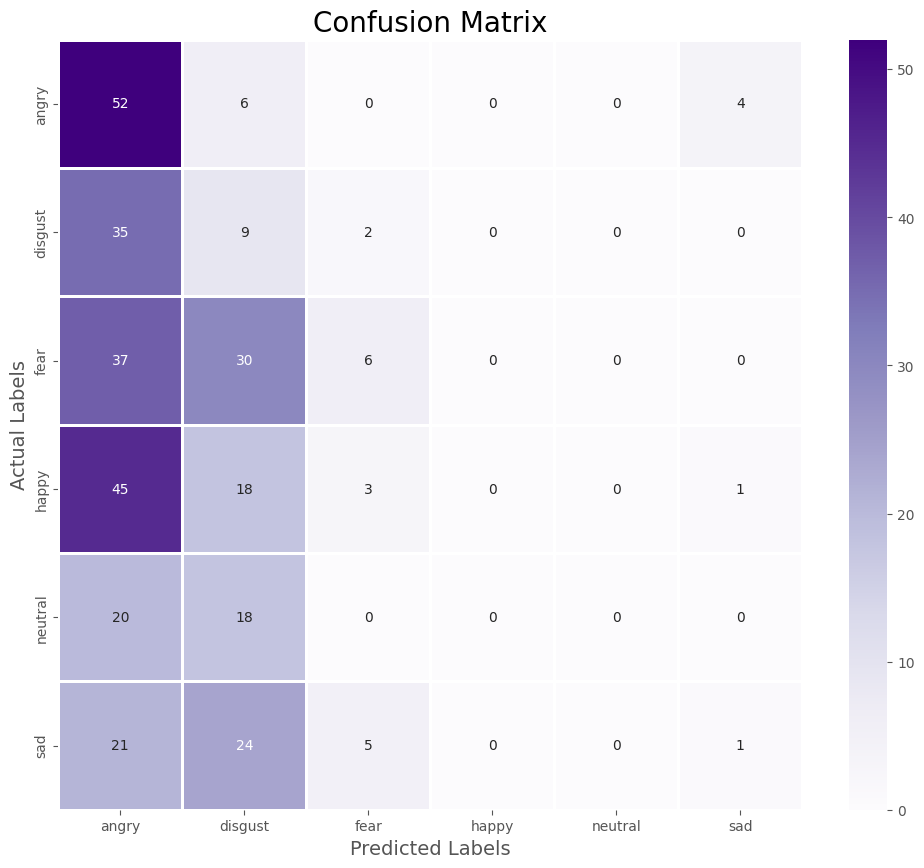

In [53]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
sns.heatmap(cm, linecolor='white', cmap='Purples', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.savefig("/content/drive/MyDrive/kaggle/working/output.eps")
plt.show()

In [54]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

       angry       0.25      0.84      0.38        62
     disgust       0.09      0.20      0.12        46
        fear       0.38      0.08      0.13        73
       happy       0.00      0.00      0.00        67
     neutral       0.00      0.00      0.00        38
         sad       0.17      0.02      0.04        51

    accuracy                           0.20       337
   macro avg       0.15      0.19      0.11       337
weighted avg       0.16      0.20      0.12       337



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
